In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
zoo_df=pd.read_csv(r'C:/Users/DELL/Downloads/Zoo.csv')
zoo_df

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

### Descriptive Analysis

In [3]:
zoo_df['animal name'].value_counts()

animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

In [4]:
zoo_df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [5]:
zoo_df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
zoo_df.describe()

hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.491512    0.384605    0.407844    0.271410    0.376013   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             legs        tail    domestic     catsize        type  
count  101.000000  101.000000  101.000000  101.000000  101.000000  
mean     2.841584    0.742574    0.128713    0.435644    2.831683  
std      2.033385    0.439397    0.336552    0.498314    2.102709  
min      0.000000    0.000000    0.000000    0.000000    1.000000  
25%      2.000000    0.000000    0.000000    0.000000    1.000000  
50%      4.000000    1.000000    0.000000    0.000000    2.000000  
75%      4.000000    1.000000    0.000000    1.000000    4.000000  
max      8.000000    1.000000    1.000000    1.000000    7.000000

In [8]:
zoo_df.duplicated().sum()

0

### Data Visualization

<Axes: >

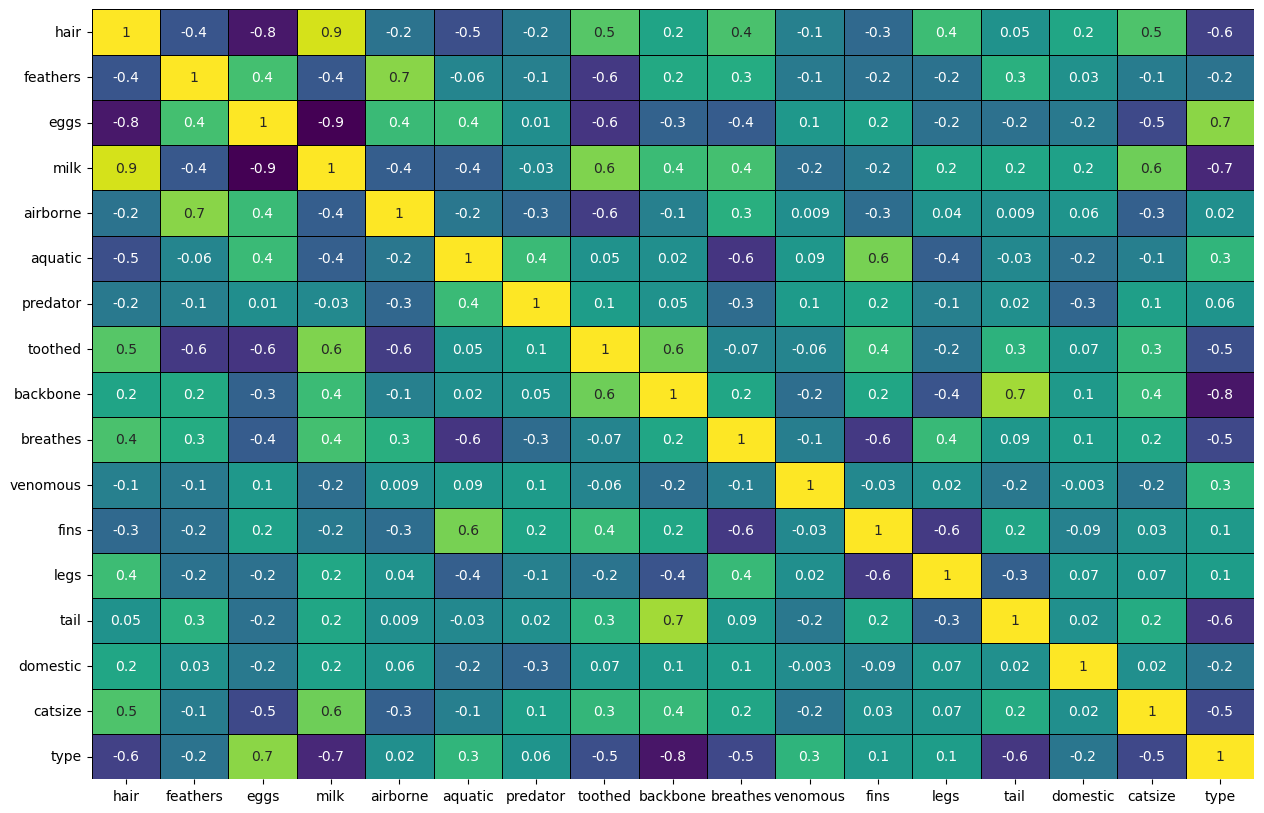

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(zoo_df.corr(numeric_only=True), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

Text(0.5, 1.0, 'Histogram of Classes')

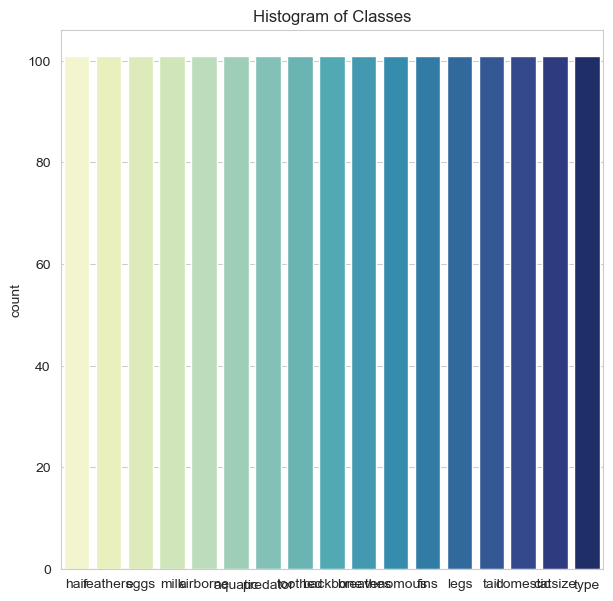

In [10]:
# Set default plot grid
sns.set_style('whitegrid')
# Plot histogram of classes
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(zoo_df, palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")

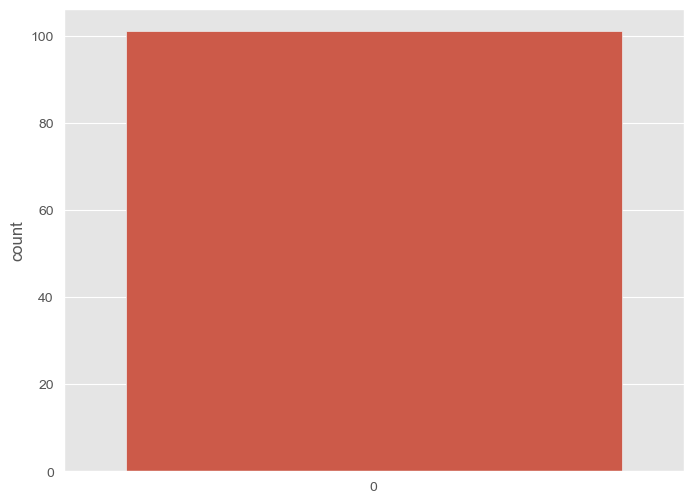

In [11]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(zoo_df['legs']);

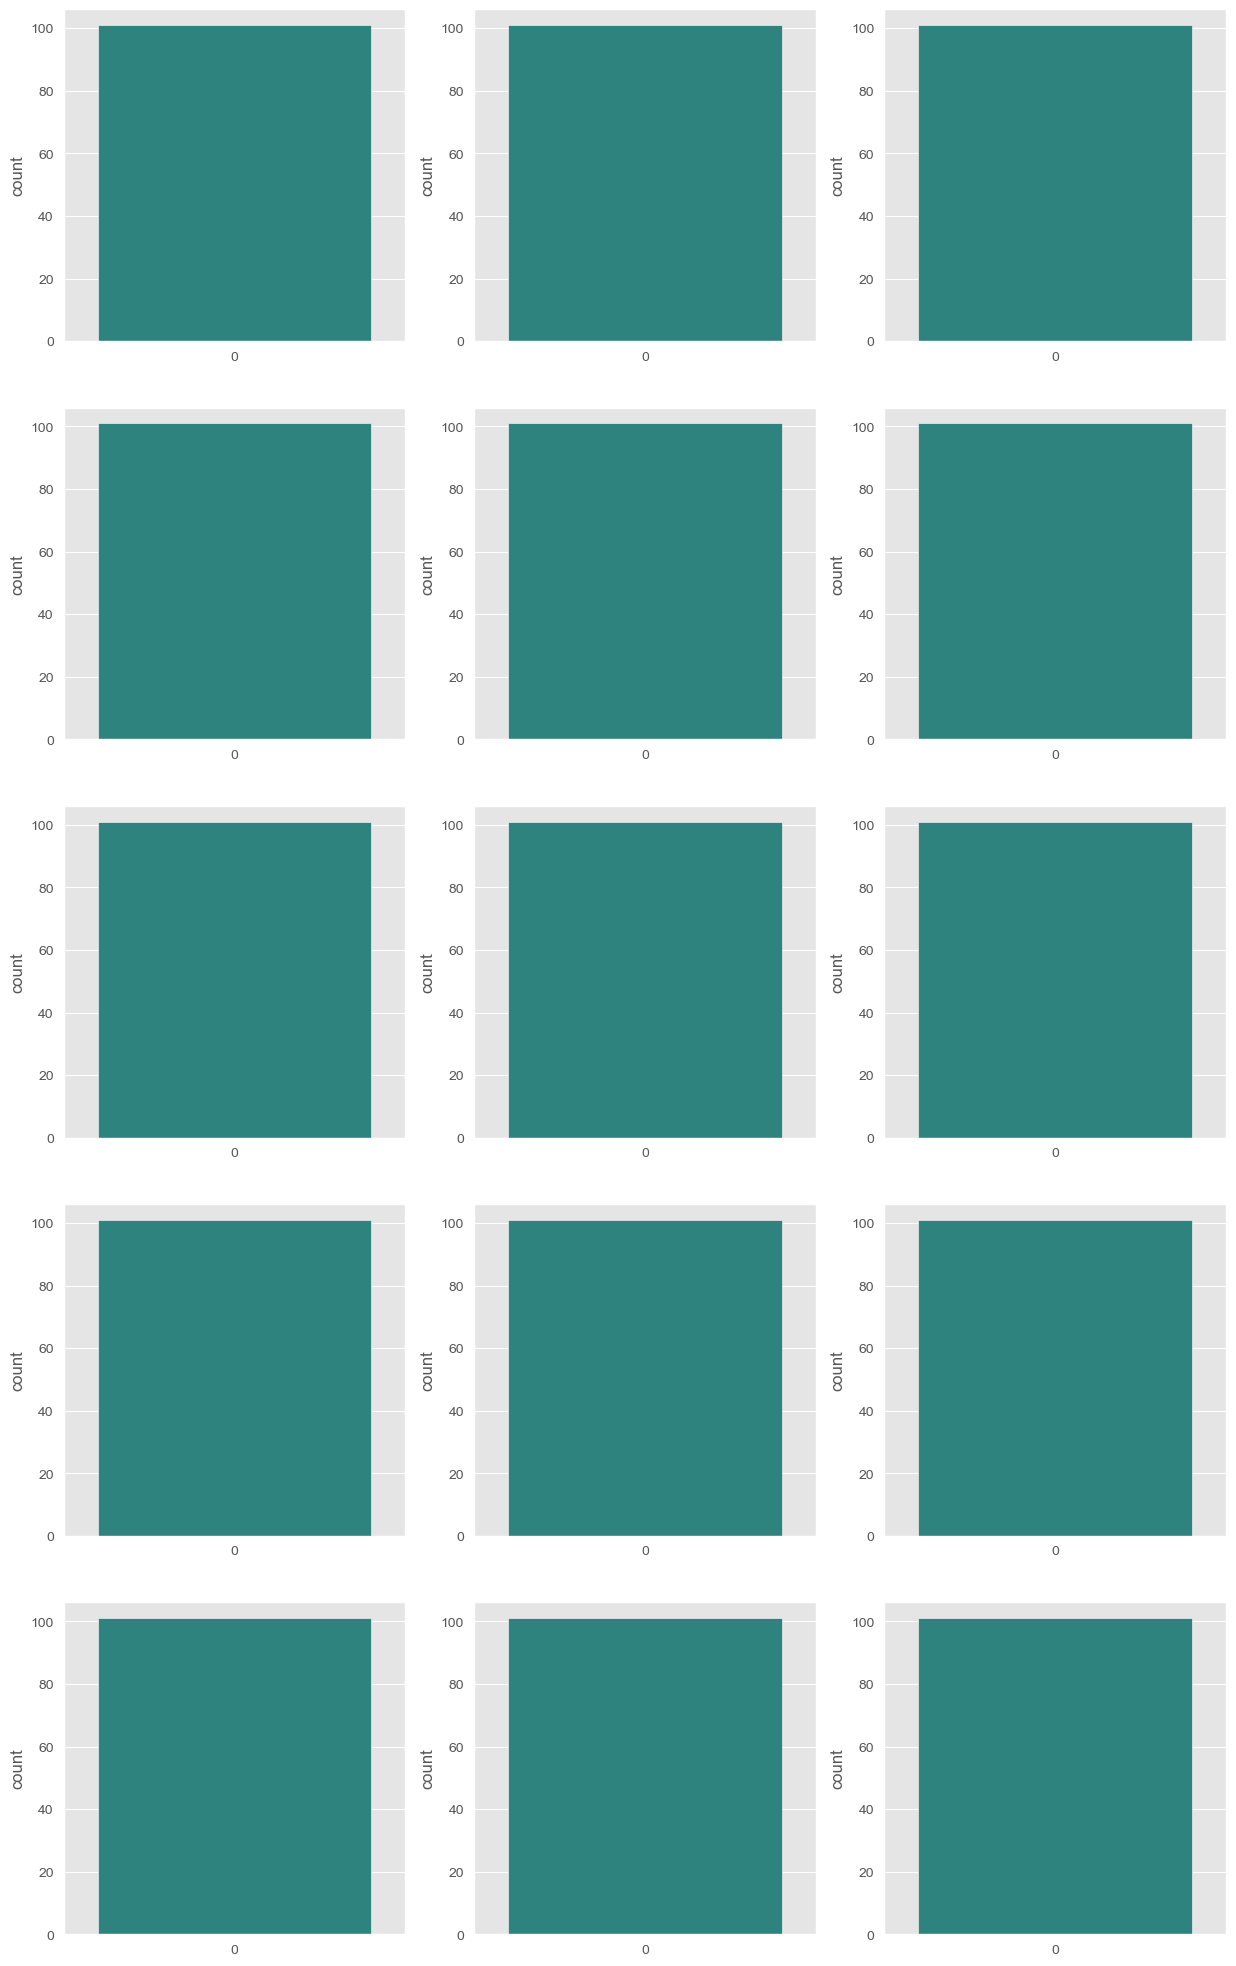

In [12]:
plt.style.use("ggplot")
fig, ax =plt.subplots(5,3, figsize=(15,25)) 

sns.countplot(zoo_df["domestic"], palette="viridis", ax=ax[0,0])
sns.countplot(zoo_df["hair"], palette="viridis", ax=ax[0,1])
sns.countplot(zoo_df["feathers"], palette="viridis", ax=ax[0,2])

sns.countplot(zoo_df["eggs"], palette="viridis", ax=ax[1,0])
sns.countplot(zoo_df["milk"], palette="viridis", ax=ax[1,1])
sns.countplot(zoo_df["airborne"], palette="viridis", ax=ax[1,2])

sns.countplot(zoo_df["aquatic"], palette="viridis", ax=ax[2,0])
sns.countplot(zoo_df["predator"], palette="viridis", ax=ax[2,1])
sns.countplot(zoo_df["toothed"], palette="viridis", ax=ax[2,2])

sns.countplot(zoo_df["backbone"], palette="viridis", ax=ax[3,0])
sns.countplot(zoo_df["breathes"], palette="viridis", ax=ax[3,1])
sns.countplot(zoo_df["venomous"], palette="viridis", ax=ax[3,2])

sns.countplot(zoo_df["fins"], palette="viridis", ax=ax[4,0])
sns.countplot(zoo_df["tail"], palette="viridis", ax=ax[4,1])
sns.countplot(zoo_df["catsize"], palette="viridis", ax=ax[4,2]);

In [13]:
zoo2=zoo_df.iloc[:,1:]
zoo2

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  type  
0           1         1         0     0     4     0         0        1     1  
1           1         1         0     0     4     1         0        1     1  
2           1         0         0     1     0     1         0        0     4  
3           1         1         0     0     4     0         0        1     1  
4           1         1         0     0     4     1         0        1     1  
..        ...       ...       ...   ...   ...   ...       ...      ...   ...  
96          1         1         0     0     2     1         0        1     1  
97          0         1         1     0     6     0         0        0     6  
98          1         1         0     0     4     1         0        1     1  
99          0         1         0     0     0     0         0        0     7  
100         1         1         0     0     2     1         0        0     2  

[101 rows x 17 columns]

In [14]:
x=zoo2.iloc[:,0:16]
y=zoo2.iloc[:,-1]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=35)

### Train the K-Neighbors Classifier without Hyper-parameter Tuning

In [28]:
k=np.sqrt(zoo2.shape[0]/2)
k

7.106335201775948

In [29]:
knn=KNeighborsClassifier(n_neighbors=7)
model=knn.fit(x_train,y_train)

In [30]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (67, 16)
Shape of X_test:  (34, 16)
Shape of y_train:  (67,)
Shape of y_test (34,)


In [31]:
model.score(x_train.values,y_train.values)

0.8208955223880597

In [32]:
y_pred=model.predict(x_test.values)
y_pred

array([6, 1, 4, 1, 2, 1, 1, 6, 6, 1, 4, 2, 2, 1, 1, 1, 2, 2, 1, 4, 1, 6,
       4, 1, 5, 1, 4, 5, 4, 2, 2, 4, 6, 6], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        12
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         1
           4       0.43      1.00      0.60         3
           5       0.00      0.00      0.00         1
           6       0.67      1.00      0.80         4
           7       0.00      0.00      0.00         6

    accuracy                           0.71        34
   macro avg       0.42      0.55      0.46        34
weighted avg       0.62      0.71      0.65        34



#### Train the K-Neighbors Classifier with Hyper-parameter Tuning

In [34]:
knnc=KNeighborsClassifier()
param_grid=dict(n_neighbors=range(1,7))

In [35]:
model=GridSearchCV(knnc,param_grid,refit=True,verbose=3)

In [36]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 3/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 4/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=1;, score=nan total time=   0.0s
[CV 1/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 3/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 4/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 5/5] END .......................n_neighbors=2;, score=nan total time=   0.0s
[CV 1/5] END .......................n_neighbors=3;, score=nan total time=   0.0s
[CV 2/5] END .......................n_neighbors=3

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 7)}, verbose=3)

In [37]:
model.best_params_

{'n_neighbors': 1}

In [38]:
model.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [40]:
model.score(x_train.values,y_train.values)

1.0

In [42]:
# Model Predictions using test data
y_pred=model.predict(x_test.values)
y_pred

array([6, 5, 7, 1, 2, 1, 1, 6, 6, 1, 7, 2, 2, 1, 1, 1, 2, 2, 1, 4, 1, 7,
       1, 5, 7, 1, 4, 5, 4, 2, 2, 1, 7, 6], dtype=int64)

In [43]:
# print classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         4
           7       1.00      0.83      0.91         6

    accuracy                           0.94        34
   macro avg       0.76      0.83      0.77        34
weighted avg       0.95      0.94      0.94        34



In [53]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)

    train_acc.append(knn.score(x_train.values,y_train.values))
    test_acc.append(knn.score(x_test.values,y_test.values))

In [55]:
train_acc


[1.0,
 0.9552238805970149,
 0.9253731343283582,
 0.9253731343283582,
 0.8805970149253731,
 0.8805970149253731,
 0.8208955223880597,
 0.8208955223880597,
 0.8208955223880597,
 0.8208955223880597,
 0.8208955223880597,
 0.8208955223880597,
 0.8059701492537313,
 0.7611940298507462,
 0.7611940298507462,
 0.7611940298507462,
 0.7611940298507462,
 0.7611940298507462,
 0.7611940298507462]

In [56]:
test_acc

[0.9411764705882353,
 0.8823529411764706,
 0.8529411764705882,
 0.7647058823529411,
 0.7352941176470589,
 0.7352941176470589,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.6470588235294118,
 0.6470588235294118,
 0.5882352941176471,
 0.5882352941176471,
 0.5882352941176471,
 0.5882352941176471,
 0.5882352941176471,
 0.5882352941176471]

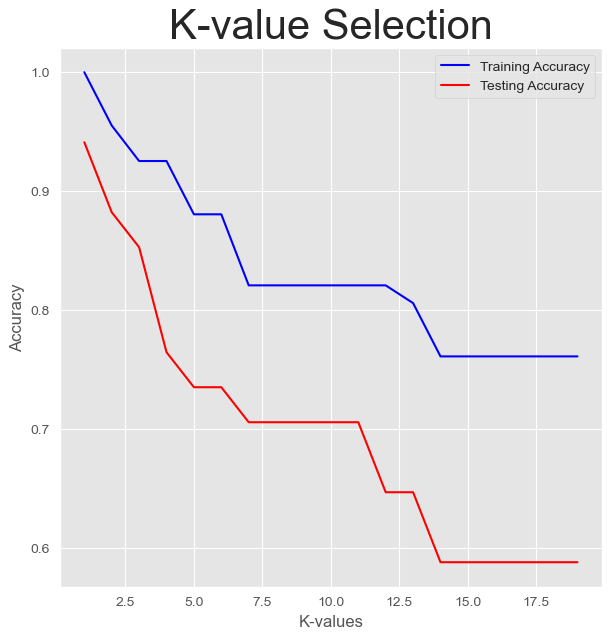

In [57]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size = 30)
plt.legend()

In [62]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
ypred = knn.predict(x_test.values)
print(f"Train: {knn.score(x_train.values,y_train.values)}\nTest: {knn.score(x_test.values,y_test.values)}")

Train: 0.8208955223880597
Test: 0.7058823529411765
